ZOMATO DATA ANALYSIS

1. What type of restaurant do the majority of customers order from?
2. How many votes has each type of restaurant recieved from customers?
3. What are the ratings that the majority of restaurants have recieved?
4. Zomato has observed that most couples order most of their food online What  is their average spending on each order?
5. Which mode(online or offline) has recieved the maximum rating?
6. Which type of restaurant recieved more offline orders, so that Zomato can promote customers with some good offers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Create the Dtaaframe

In [3]:
dataframe=pd.read_csv("E:\Self-learning\EDA Projects\Zomato Data Analysis\Zomato data .csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Converting Datatype of rate to float and remove denominator

In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Summary of the Dataframe

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Cnclusion-There is no null value in dataframe

Type of Restaurant

Text(0.5, 0, 'Type of restaurant')

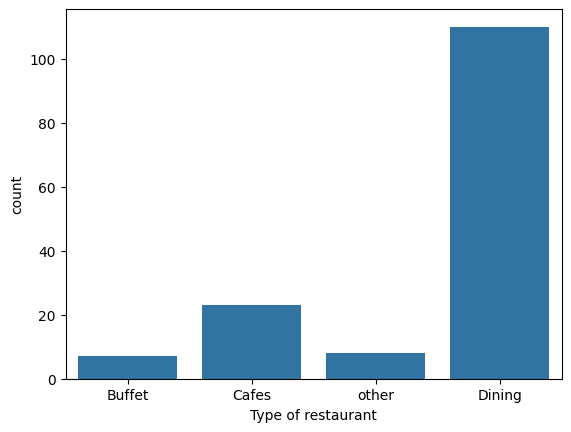

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion: Dining restaurants are preferred by a large number of individuals

In [10]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [18]:
result=pd.DataFrame(grouped_data)

In [19]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

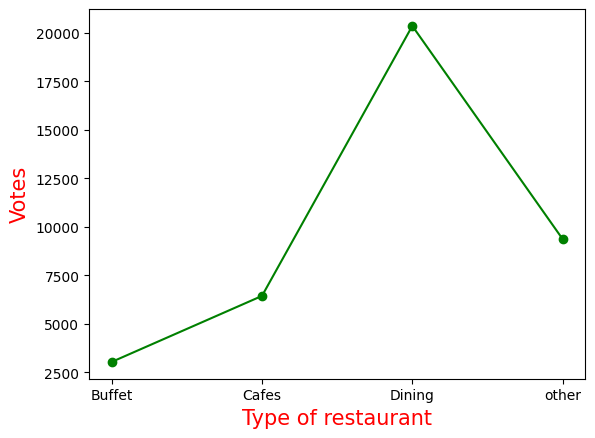

In [24]:
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurant",c='red',size=15)
plt.ylabel("Votes",c='red',size=15)

Majority restaurants recieved ratings

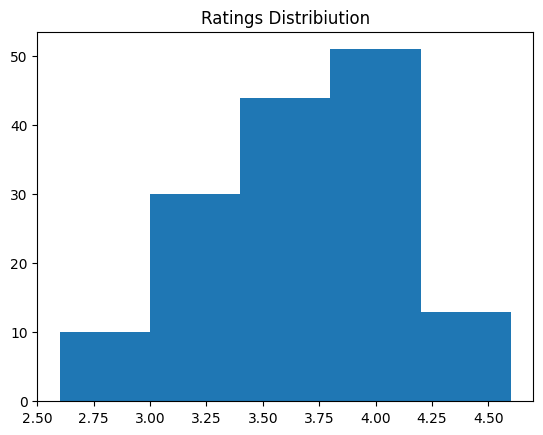

In [27]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribiution')
plt.show()

Conclusion: Majority restaurants recieved ratings ranging from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

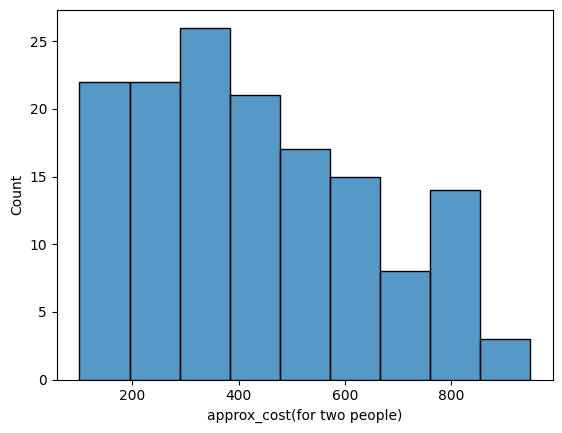

In [ ]:
sns.histplot(dataframe['approx_cost(for two people)']) 

Conclusion: Majority of couple prefer restaurants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

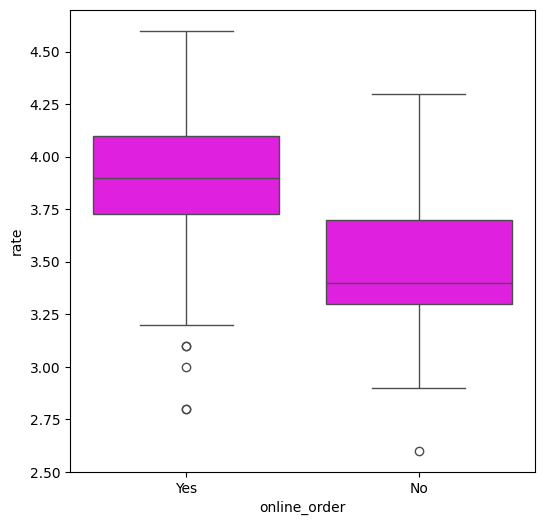

In [39]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe,color='magenta')

Conclusion: Offline orders recieved lower ratings in comparison to online orders, which obtained excellent ratings.

In [10]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)

In [11]:
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


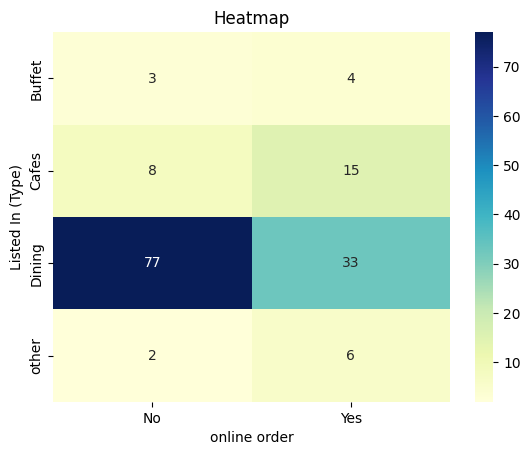

In [12]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu")
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('Listed In (Type)')
plt.show()

Conclusion: Dining Restaurants primarily accept offline orders,whereas cafes primarily recieve online orders. This suggests that clients prefer to place orders in person at restaurants, bit prefer online ordering at cafes